In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vjchoudhary7/customer-segmentation-tutorial-in-python")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/customer-segmentation-tutorial-in-python


In [4]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv('/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
#we just need annual income and spending score, and based on that we will cluster the customers data
df = df[['Annual Income (k$)', 'Spending Score (1-100)']]
df.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [8]:
#lets rename the column
df = df.rename(columns={'Annual Income (k$)':'AnnualIncome', 'Spending Score (1-100)':'SpendingScore'})
df.head()

,AnnualIncome,SpendingScore
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [10]:
df.shape

(200, 2)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   AnnualIncome   200 non-null    int64
 1   SpendingScore  200 non-null    int64
dtypes: int64(2)
memory usage: 3.3 KB


In [12]:
df.isnull().sum()

,0
AnnualIncome,0
SpendingScore,0


In [13]:
df.describe()

,AnnualIncome,SpendingScore
count,200.000000,200.000000
mean,60.560000,50.200000
std,26.264721,25.823522
min,15.000000,1.000000
25%,41.500000,34.750000
50%,61.500000,50.000000
75%,78.000000,73.000000
max,137.000000,99.000000


In [14]:
#lets collect wcss(within cluster, sum of squares) for each n clusters
wcss=[]
for i in range(1,11):
  kMeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kMeans.fit(df)
  wcss.append(kMeans.inertia_)

In [15]:
wcss

[269981.28000000014,
 183653.3289473683,
 106348.37306211119,
 73880.64496247198,
 44448.45544793369,
 40825.16946386947,
 33642.57922077922,
 26686.837785187785,
 24766.471609793436,
 23103.122085983905]

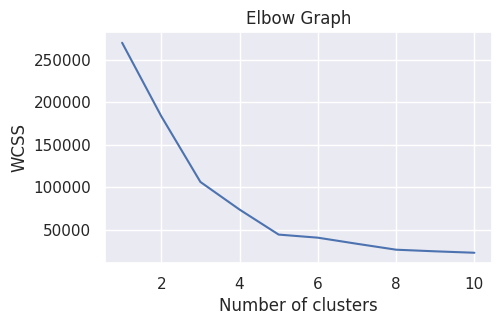

In [20]:
#lets use this to get elbow graph
sns.set()
plt.figure(figsize=(5,3))
plt.plot(range(1,11), wcss)
plt.title('Elbow Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [22]:
#we can see that 5 is the number of cluster, where there is an abrupt change in the wcss value.
model = KMeans(n_clusters=5, init='k-means++', random_state=42)
model.fit(df)
model

KMeans(n_clusters=5, random_state=42)

In [23]:
Y = model.fit_predict(df)
Y

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

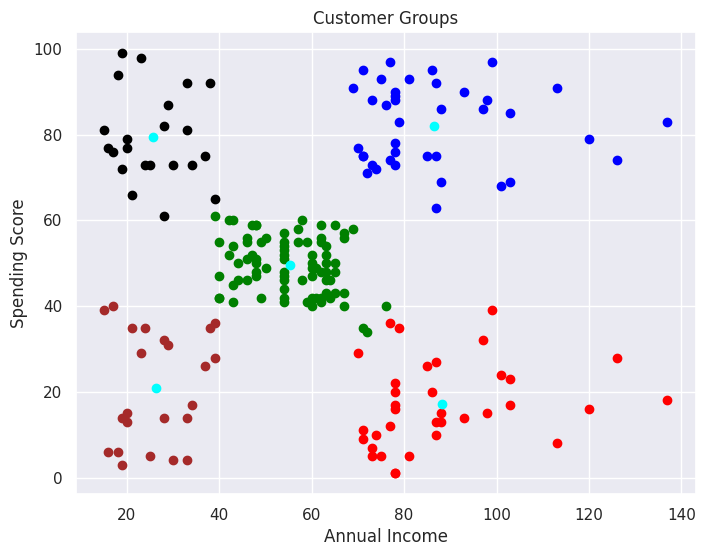

In [45]:
#now we will be plotting both the points annual income, spending score, centroids
sns.set()
plt.figure(figsize=(8,6))
plt.scatter(df.iloc[Y==0,0], df.iloc[Y==0,1], c='green', label='Cluster 1')
plt.scatter(df.iloc[Y==1,0], df.iloc[Y==1,1], c='blue', label='Cluster 2')
plt.scatter(df.iloc[Y==2,0], df.iloc[Y==2,1], c='black', label='Cluster 3')
plt.scatter(df.iloc[Y==3,0], df.iloc[Y==3,1], c='red', label='Cluster 4')
plt.scatter(df.iloc[Y==4,0], df.iloc[Y==4,1], c='brown', label='Cluster 5')
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], c='cyan')
plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()